In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.rcParams["axes.unicode_minus"] = False
import warnings

warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import parser
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
features = pd.read_csv("C:/Users/zofld/Desktop/modeling/총승차승객수.csv", encoding="cp949")
features.head(5)
features.set_index('노선번호',inplace=True)
labels=features["총승차승객수"]
del features["총승차승객수"]
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=29
)


from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(n_estimators=1200, random_state=42)
rf1.fit(train_features, train_labels)
predictions = rf1.predict(test_features)
errors = abs(predictions - test_labels)
print("RMSE : ", round(mean_squared_error(test_labels, predictions)**0.5, 2))
print("MAE : ", round(np.mean(errors), 2))
mape = 100 * (errors / test_labels)
print("MAPE : ", np.mean(mape))
accuracy = 100 - np.mean(mape)
print("Accuracy:", round(accuracy, 5), "%.")

RMSE :  147340.08
MAE :  108607.6
MAPE :  23.379537070466398
Accuracy: 76.62046 %.


In [3]:
predict_features = pd.read_csv("C:/Users/zofld/Desktop/modeling/newbus.csv", encoding="cp949")
predict_features.set_index('노선번호',inplace=True)
labels=predict_features["총승차승객수"]
del predict_features["총승차승객수"]
result = rf1.predict(predict_features)
result

array([667384.75833333, 610281.58166667, 230103.4125    ])

In [4]:
train_predictions = rf1.predict(train_features)
test_predictions = rf1.predict(test_features)

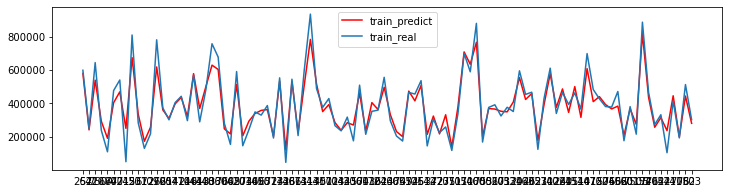

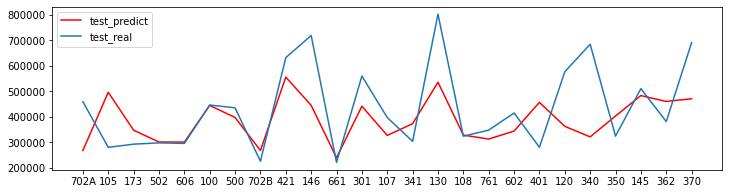

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train_predictions = rf1.predict(train_features)
test_predictions = rf1.predict(test_features)
plt.figure(figsize=(12,3))
plt.plot(train_predictions, label = 'train_predict', color = 'red')
plt.plot(train_labels, label = 'train_real')
plt.legend()
plt.show()

plt.figure(figsize=(12,3))
plt.plot(test_predictions, label = 'test_predict', color = 'red')
plt.plot(test_labels, label = 'test_real')
plt.legend()
plt.show()

In [ ]:
print("Training Features Shape:", train_features.shape)
print("Training Features Shape:", train_labels.shape)
print("Training Features Shape:", test_features.shape)
print("Training Features Shape:", test_labels.shape)

In [3]:
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
train_rmse = []
train_mae = []
train_mape = []

test_rmse = []
test_mae = []
test_mape = []

n_estima = []
for k in tqdm(range(1000,10000,50)):
    dt = RandomForestRegressor(n_estimators=k, random_state=42)
    dt.fit(train_features, train_labels)
    
    train_predictions = dt.predict(train_features)
    test_predictions = dt.predict(test_features)
    
    train_rmse.append(round(mean_squared_error(train_labels, train_predictions)**0.5, 2))
    test_rmse.append(round(mean_squared_error(test_labels, test_predictions)**0.5, 2))
    
    
    train_errors = abs(train_predictions - train_labels)
    train_mae.append(round(np.mean(train_errors)))
    
    test_errors = abs(test_predictions - test_labels)
    test_mae.append(round(np.mean(test_errors), 2))
    
    train__mape = 100 * (train_errors / train_labels)
    train_mape.append(round(np.mean(train__mape), 5))
    test__mape = 100 * (test_errors / test_labels)
    test_mape.append(round(np.mean(test__mape), 5))
    n_estima.append(k)
    print('n_estimators = %d done.' %k)

n_estimators = 1000 done.
n_estimators = 1050 done.
n_estimators = 1100 done.
n_estimators = 1150 done.
n_estimators = 1200 done.
n_estimators = 1250 done.
n_estimators = 1300 done.
n_estimators = 1350 done.
n_estimators = 1400 done.
n_estimators = 1450 done.
n_estimators = 1500 done.
n_estimators = 1550 done.
n_estimators = 1600 done.
n_estimators = 1650 done.
n_estimators = 1700 done.
n_estimators = 1750 done.
n_estimators = 1800 done.
n_estimators = 1850 done.
n_estimators = 1900 done.
n_estimators = 1950 done.
n_estimators = 2000 done.
n_estimators = 2050 done.
n_estimators = 2100 done.
n_estimators = 2150 done.
n_estimators = 2200 done.
n_estimators = 2250 done.
n_estimators = 2300 done.
n_estimators = 2350 done.
n_estimators = 2400 done.
n_estimators = 2450 done.
n_estimators = 2500 done.
n_estimators = 2550 done.
n_estimators = 2600 done.
n_estimators = 2650 done.
n_estimators = 2700 done.
n_estimators = 2750 done.
n_estimators = 2800 done.
n_estimators = 2850 done.
n_estimators

In [8]:
test_rmse

[146903.2,
 146983.6,
 146924.21,
 147156.48,
 147340.08,
 147422.58,
 147720.37,
 147693.97,
 147713.17,
 147800.59,
 147543.57,
 147405.08,
 147483.44,
 147460.11,
 147287.49,
 147365.83,
 147296.72,
 147257.4,
 147274.77,
 147325.57,
 147380.04,
 147339.5,
 147497.03,
 147542.12,
 147524.68,
 147522.19,
 147542.03,
 147410.94,
 147403.87,
 147300.46,
 147257.51,
 147231.94,
 147228.3,
 147430.12,
 147408.85,
 147494.36,
 147471.71,
 147396.42,
 147475.48,
 147447.92,
 147504.79,
 147538.69,
 147586.54,
 147577.99,
 147500.8,
 147585.77,
 147695.69,
 147718.77,
 147782.84,
 147816.47,
 147848.37,
 147797.21,
 147809.18,
 147863.32,
 147814.75,
 147844.28,
 147823.14,
 147877.0,
 147782.57,
 147811.6,
 147749.96,
 147794.9,
 147847.64,
 147813.32,
 147930.71,
 147925.13,
 147820.51,
 147731.34,
 147686.51,
 147624.7,
 147609.9,
 147721.41,
 147672.48,
 147723.09,
 147737.23,
 147666.73,
 147684.65,
 147656.39,
 147731.03,
 147732.73,
 147777.29,
 147749.86,
 147740.75,
 147779.88,
 14

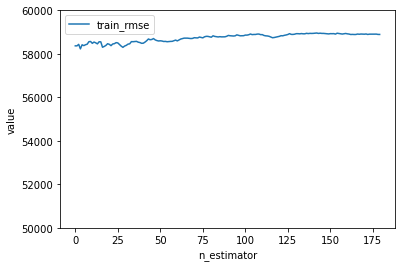

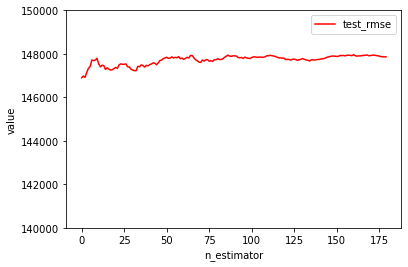

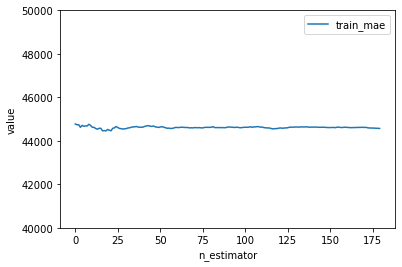

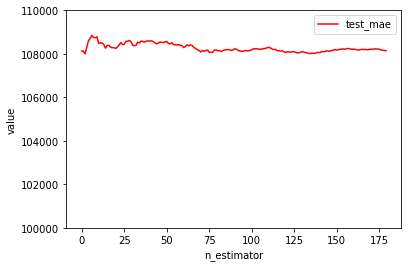

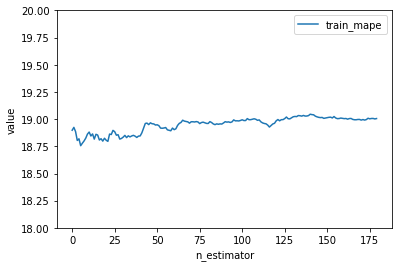

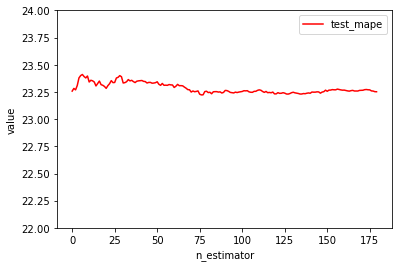

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


plt.plot(train_rmse, label = 'train_rmse')
plt.ylim(50000,60000)
plt.legend()
plt.xlabel('n_estimator')
plt.ylabel('value')
plt.show()

plt.plot(test_rmse, label = 'test_rmse', color = 'red')
plt.ylim(140000,150000)
plt.legend()
plt.xlabel('n_estimator')
plt.ylabel('value')
plt.show()


plt.plot(train_mae, label = 'train_mae')
plt.legend()
plt.ylim(40000,50000)
plt.xlabel('n_estimator')
plt.ylabel('value')
plt.show()

plt.plot(test_mae, label = 'test_mae', color = 'red')
plt.legend()
plt.ylim(100000,110000)
plt.xlabel('n_estimator')
plt.ylabel('value')
plt.show()


plt.plot(train_mape, label = 'train_mape')
plt.legend()
plt.ylim(18, 20)
plt.xlabel('n_estimator')
plt.ylabel('value')
plt.show()

plt.plot(test_mape, label = 'test_mape', color = 'red')
plt.legend()
plt.ylim(22, 24)
plt.xlabel('n_estimator')
plt.ylabel('value')
plt.show()



In [19]:
test_mse

[21580550808.53,
 21580550808.53,
 21580550808.53,
 21580550808.53,
 21580550808.53,
 21580550808.53,
 21580550808.53,
 21580550808.53,
 21580550808.53,
 21580550808.53,
 21580550808.53,
 21580550808.53,
 21580550808.53,
 21580550808.53,
 21580550808.53,
 21580550808.53,
 21580550808.53,
 21580550808.53,
 21580550808.53,
 21580550808.53]

In [12]:
test_mse = []
test_mae = []
test_mape = []
seed = []
for k in tqdm(range(1,100)):
    dt = RandomForestRegressor(n_estimators=1200, random_state=k)
    dt.fit(train_features, train_labels)
    test_mse.append(round(mean_squared_error(test_labels, predictions), 2))
    predictions = dt.predict(test_features)
    errors = abs(predictions - test_labels)
    test_mae.append(round(np.mean(errors), 2))
    mape = 100 * (errors / test_labels)
    test_mape.append(round(np.mean(mape), 5))
    n_estima.append(k)
    print('seed = %d done.' %k)

seed = 1 done.
seed = 2 done.
seed = 3 done.
seed = 4 done.
seed = 5 done.
seed = 6 done.
seed = 7 done.
seed = 8 done.
seed = 9 done.
seed = 10 done.
seed = 11 done.
seed = 12 done.
seed = 13 done.
seed = 14 done.
seed = 15 done.
seed = 16 done.
seed = 17 done.
seed = 18 done.
seed = 19 done.
seed = 20 done.
seed = 21 done.
seed = 22 done.
seed = 23 done.
seed = 24 done.
seed = 25 done.
seed = 26 done.
seed = 27 done.
seed = 28 done.
seed = 29 done.
seed = 30 done.
seed = 31 done.
seed = 32 done.
seed = 33 done.
seed = 34 done.
seed = 35 done.
seed = 36 done.
seed = 37 done.
seed = 38 done.
seed = 39 done.
seed = 40 done.
seed = 41 done.
seed = 42 done.
seed = 43 done.
seed = 44 done.
seed = 45 done.
seed = 46 done.
seed = 47 done.
seed = 48 done.
seed = 49 done.
seed = 50 done.
seed = 51 done.
seed = 52 done.
seed = 53 done.
seed = 54 done.
seed = 55 done.
seed = 56 done.
seed = 57 done.
seed = 58 done.
seed = 59 done.
seed = 60 done.
seed = 61 done.
seed = 62 done.
seed = 63 done.
s

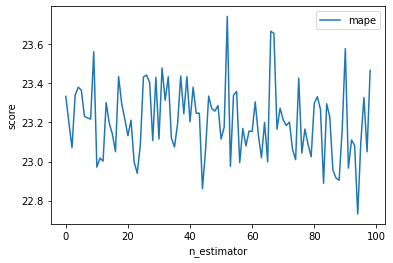

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.plot(test_mse, label = 'mse')
#plt.plot(test_mae, label = 'mae')
plt.plot(test_mape, label = 'mape')
plt.legend()
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.show()

In [ ]:
errors = abs(predictions - test_labels)
print("Mean Absolute Error:", round(np.mean(errors), 2), "degrees.")
mape = 100 * (errors / test_labels)
print("MAPE : ", np.mean(mape))
accuracy = 100 - np.mean(mape)
print("Accuracy:", round(accuracy, 5), "%.")

In [8]:
features_a = MinMaxScaler().fit_transform(features[["지나는 지역구 거주민 평균 (반올림)"]])
features_a
features["지나는 지역구 거주민 평균 (반올림)"] = features_a
features

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,영등포구,용산구,은평구,종로구,중구,중랑구,지나는 지역구 거주민 평균 (반올림),지나는 지역구 거주민 합,노선별 겹치는 노선 수,환승 비율 총 승객수
노선번호,,,,,,,,,,,,,,,,,,,,,
100,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0.349076,1343564,62,0.558044
101,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0.178612,1063418,46,0.534859
102,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0.388141,1407765,31,0.463655
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0.193046,1087140,58,0.450547
104,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0.165644,1042107,40,0.285560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.698873,479607,10,0.071116
702A,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0.000000,769882,44,0.149416
702B,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0.000000,769882,44,0.149375


In [ ]:
features_a = MinMaxScaler().fit_transform(features[["지나는 지역구 거주민 합"]])
features_a
features["지나는 지역구 거주민 합"] = features_a
features

In [ ]:
features_a = MinMaxScaler().fit_transform(features[["노선별 겹치는 노선 수"]])
features_a
features["노선별 겹치는 노선 수"] = features_a
features

In [ ]:
features_a = MinMaxScaler().fit_transform(features[["환승 비율 총 승객수"]])
features_a
features["환승 비율 총 승객수"] = features_a
features

In [ ]:
features = pd.read_csv("C:/Users/zofld/Desktop/modeling/총승차승객수.csv", encoding="cp949")
features.head(5)
newbus = pd.read_csv("C:/Users/zofld/Desktop/modeling/newbus.csv", encoding="cp949")
#features_a = MinMaxScaler().fit_transform(features[["환승 비율 총 승객수"]])
#features_a
#features["환승 비율 총 승객수"] = features_a
#features_a = MinMaxScaler().fit_transform(features[["지나는 지역구 거주민 평균 (반올림)"]])
#features_a
#features["지나는 지역구 거주민 평균 (반올림)"] = features_a
#features_a = MinMaxScaler().fit_transform(features[["지나는 지역구 거주민 합"]])
#features_a
#features["지나는 지역구 거주민 합"] = features_a
#features_a = MinMaxScaler().fit_transform(features[["노선별 겹치는 노선 수"]])
#features_a
#features["노선별 겹치는 노선 수"] = features_a



features.set_index('노선번호',inplace=True)
newbus.set_index('노선번호',inplace=True)
labels=features["총승차승객수"]
del features["총승차승객수"]
del newbus["총승차승객수"]

from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=29
)
print("Training Features Shape:", train_features.shape)
print("Training Features Shape:", train_labels.shape)
print("Training Features Shape:", test_features.shape)
print("Training Features Shape:", test_labels.shape)
from sklearn.ensemble import RandomForestRegressor

rf1 = RandomForestRegressor(n_estimators=1200, random_state=42)
rf1.fit(train_features, train_labels)
predictions = rf1.predict(test_features)
errors = abs(predictions - test_labels)
print("Mean Absolute Error:", round(np.mean(errors), 2), "degrees.")
mape = 100 * (errors / test_labels)
print("MAPE : ", np.mean(mape))
accuracy = 100 - np.mean(mape)
print("Accuracy:", round(accuracy, 5), "%.")
